# OOP Pipeline For Basic Linear Regression

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data.drop('Unnamed: 0', 1, inplace=True)
cleaned_data.rename({'y_yes': 'subscribed_deposit'}, axis=1, inplace=True)
cleaned_data.isna().sum()

subscribed_deposit     0
age                    0
balance                0
duration               0
campaign               0
previous               0
marital_married        0
marital_single         0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
education_secondary    0
education_tertiary     0
default_yes            0
housing_yes            0
loan_yes               0
dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np 
import statsmodels.api as sm 
import pylab as py
from sklearn.model_selection import cross_val_score
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(10,13)}, font_scale = 2)

class Basic_Linear_Regression(object):
    def __init__(self, df, target_col_name, test_size):
        cleaned_data_y = df.loc[:, cleaned_data.columns == target_col_name]
        cleaned_data_x = df.loc[:, cleaned_data.columns != target_col_name]

        x_train, x_test, y_train, y_test = train_test_split(cleaned_data_x, cleaned_data_y, test_size=test_size, random_state= 1254)
        
        self.x_train_constant = sm.add_constant(x_train)# adding a constant
        self.x_test_constant = sm.add_constant(x_test)
        self.y_train = y_train
        self.y_test = y_test
        self.test_size = test_size
        
    def training_rmse(self):
        #Returns Training RMSE
        #Returns y_pred
        lm = LinearRegression()
        lm.fit(self.x_train_constant, self.y_train)
        y_pred = lm.predict(self.x_test_constant)

        # Compute the root-mean-square
        MSEs = cross_val_score(lm, self.x_train_constant, y=self.y_train, scoring='neg_mean_squared_error', cv=int((1/self.test_size)))
        RMSE = (MSEs*-1)**0.5        
        return statistics.mean(RMSE), RMSE
    
    def testing_rmse(self):
        #Returns Testing RMSE
        lm = LinearRegression()
        lm.fit(self.x_train_constant, self.y_train)
        y_pred = lm.predict(self.x_test_constant)

        RMSE_testing = np.sqrt(mean_squared_error(self.y_test, y_pred))
        return RMSE_testing

    def model_summary(self):#Regression Model
        #Returns Model Summary
        #Returns Linear Regression Variables That are not significant
        model=sm.OLS(self.y_train, self.x_train_constant).fit()

        pvalues_df = pd.DataFrame(model.pvalues)
        pvalues_df.reset_index(inplace=True)
        pvalues_df.rename(columns={"index": "Variables", 0: "Pvalues"}, inplace=True)
        
        df_not_significant = pvalues_df.loc[pvalues_df['Pvalues'] > .05]
        df_not_significant['Pvalues'] = df_not_significant['Pvalues'].apply(lambda x: '%.5f' % x)
        return model.summary(), df_not_significant

    def feature_importance(self): #Creates new dataframe for all significant variables
        #'Figure Showing Relative Variable Coefficients, Remember Some Are Continuous:
        model=sm.OLS(self.y_train, self.x_train_constant).fit()
        coefficients_df = pd.DataFrame(model.params)
        coefficients_df.reset_index(inplace=True)
        coefficients_df.rename(columns={"index": "Variables", 0: "Absolute_Coefficients"}, inplace=True)
        coefficients_df['Absolute_Coefficients'] = abs(coefficients_df['Absolute_Coefficients'])
        coefficients_df.sort_values(by=["Absolute_Coefficients"], ascending=False, inplace=True)
        Feature_Importance = sns.barplot(x="Absolute_Coefficients", y="Variables", data=coefficients_df)
        reminder = 'Remember Some Variables are Continuous and Thus More Important Than Represented Single Unit Value'
        return reminder, Feature_Importance


    def regression_scatter(self):
        lm = LinearRegression()
        lm.fit(self.x_train_constant, self.y_train)
        y_pred = lm.predict(self.x_test_constant)
        
        #'This is a plot of the Regression fitting  Test Data:'
        sns.set(style='ticks')
        plot1 = sns.regplot(self.y_test, y=y_pred, scatter_kws={'alpha':0.5});
        plt.title('Prediction Performance for Age')
        plt.ylabel('Age')
        plt.xlabel('Trained Regression')
        return plot1
        
        # np.random generates different random numbers 
        # whenever the code is executed 
        # Note: When you execute the same code  
        # the graph look different than shown below.
        
    def qq_plot(self):
        # This is a QQplot which tests for a normal distribution of residuals where residuals should follow line:
        model=sm.OLS(self.y_train, self.x_train_constant).fit()        
        data_points = model.resid
        sm.qqplot(data_points, line ='45')

In [106]:
Linear_Regression = Basic_Linear_Regression(cleaned_data, 'age', 0.2)

In [114]:
Linear_Regression.training_rmse()

(8.168854102283158,
 array([8.11755274, 8.09814013, 8.19085997, 8.22683642, 8.21088125]))

In [115]:
Linear_Regression.testing_rmse()

8.366887474463331

In [116]:
Linear_Regression.model_summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    age   R-squared:                       0.407
 Model:                            OLS   Adj. R-squared:                  0.406
 Method:                 Least Squares   F-statistic:                     1118.
 Date:                Fri, 01 Jan 2021   Prob (F-statistic):               0.00
 Time:                        12:11:42   Log-Likelihood:            -1.2645e+05
 No. Observations:               35938   AIC:                         2.529e+05
 Df Residuals:                   35915   BIC:                         2.531e+05
 Df Model:                          22                                         
 Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------

('Remember Some Variables are Continuous and Thus More Important Than Represented Single Unit Value',
 <AxesSubplot:xlabel='Absolute_Coefficients', ylabel='Variables'>)

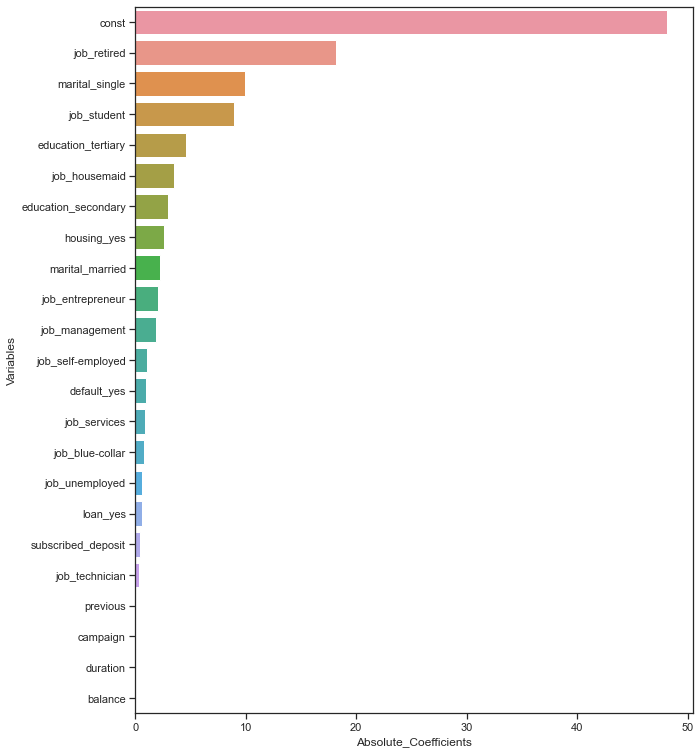

In [117]:
Linear_Regression.feature_importance()

<AxesSubplot:title={'center':'Prediction Performance for Age'}, xlabel='Trained Regression', ylabel='Age'>

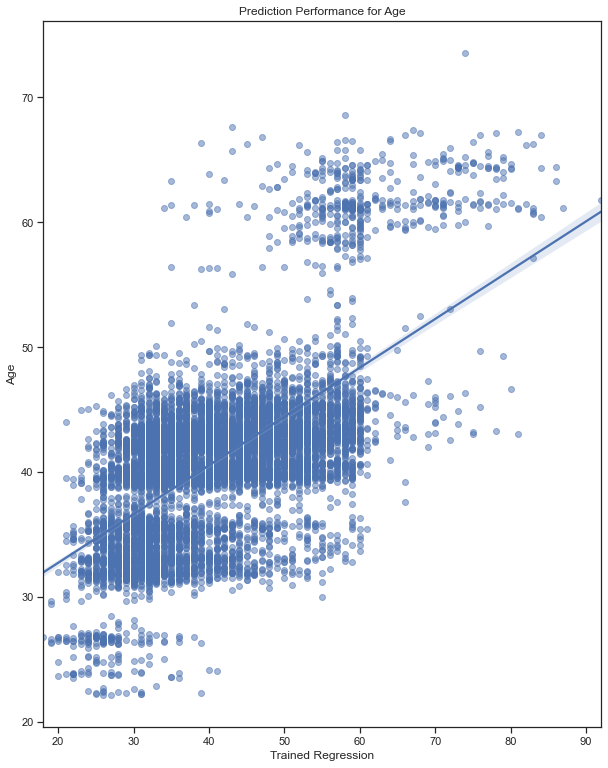

In [118]:
Linear_Regression.regression_scatter()

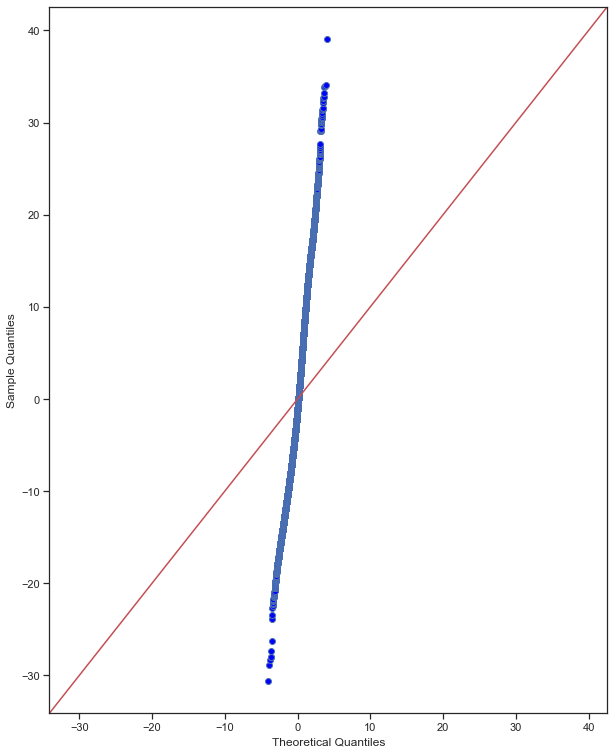

In [119]:
Linear_Regression.qq_plot()